In [1]:
"""
First insights:

* If an input is trained, it will stay stable, even if it receives less inputs in a second run
* If an input was trained less in a first run, it will strenghten its connections later if its stimuated more often then
* But in this case it will take much more time, since only few spikes are available which takes some time to build up
* If both inputs are trained strongly, further activating patterns have not really any impact anymore
-> An input aquires a specific amount of neurons and stably saturates
-> If it's relatively weak in the beginning it can still become saturates, but then it takes longer

Next steps:
* What happens when the network is bigger?
* What happens when the input it smaller/bigger?
* What happens when a third input comes into play?
* Add noise to allow re-allocation

"""
print('')

In [2]:
import os
import sys

path = '/home/seq/pelenet'
sys.path.append(path)
os.chdir(path)

In [3]:
# Allow reload of objects
%load_ext autoreload
%autoreload

from pelenet.utils import Utils
from pelenet.experiments.assemblies import AssemblyExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time
from copy import deepcopy

In [4]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/random.py)
parameters = {
    # Experiment
    'seed': 1,  # Random seed
    'trials': 40, #20,  # Number of trials
    'stepsPerTrial': 40, #50,  # Number of simulation steps for every trial
    'isReset': True,  # Activate reset after every trial
    # Network
    'reservoirExSize': 400,  # Number of excitatory neurons
    'reservoirConnPerNeuron': 35, #35 # Number of connections per neuron
    # Noise
    'isNoise': True,
    'onlyExcitatory': True,  # Noisy input is only excitatory
    'noiseMaxWeight': 120, #120,
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 100, #100 # Voltage time constant
    'currentTau': 6, #5 # Current time constant
    'thresholdMant': 1200, #1200  # Spiking threshold for membrane potential
    # Plasticity
    'isLearningRule': True,
    'learningEpoch': 4,
    'learningRule': '2^-2*x1*y0 - 2^-2*y1*x0 + 2^-4*x1*y1*x0*y0 - 2^-3*y0*w*w', #'2^-2*x1*y0 - 2^-2*y1*x0 + 2^-4*x1*y1*y0 - 2^-3*y0*w*w',
    #'learningRule': '2^-3*x1*y1*x0*y0 - 2^-3*y0*w*w',
    #'learningRule': '2^-2*x1*y0 - 2^-2*y1*x0 + 2^-3*y0*w*w',
    # Input
    'inputIsVary': True,
    'inputOffset': 10,
    'inputVaryProbs': [0.1, 0.9],
    'inputGenSpikeProb': 0.8,  # Probability of spikes for the spike generators
    'inputNumTargetNeurons': 40,  # Number of neurons targeted by the spike generators
    'inputSteps': 20, #30,  # Number of steps the input is active
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,  # Probe inhibitory spikes
    'isWeightProbe': True  # Probe weight matrix at the end of the simulation
}

In [5]:
# Initilizes the experiment and utils
exp = AssemblyExperiment(name='assemblies', parameters=parameters)
utils = Utils.instance()

In [6]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

0.922

In [7]:
#exp.net.plot.initialExWeightDistribution()

In [8]:
#exp.net.noiseWeights.toarray()[:20,:20]

In [9]:
pars = exp.net.p

In [10]:
pars.noiseNeurons

40

In [11]:
noise = pars.reservoirExSize * pars.noiseDens * (pars.noiseMaxWeight/2) * pars.noiseSpikeprob
print(noise)

inp = pars.inputNumTargetNeurons * 11.304 * pars.inputGenSpikeProb
print(inp)

print(np.round(noise/inp*100)/100, '%')

60.0
361.72800000000007
0.17 %


In [12]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:33161
INFO:DRV:      Host server up..............Done 0.18s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1611662958.297802
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1611662958.297802/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/

INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1611662958.297802/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 60, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61 to 70
INFO:HST:  chip=0 cpu=0 Reset functional state at 70
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 121 to 130
INFO:HST:  chip=0 cpu=0 Reset functional state at 130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 181 to 190
INFO:HST:  chip=0 cpu=0 Reset functional state at 190
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 241 to 250
INFO:HST:  chip=0 cpu=0 Reset functional state at 250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 301 to 310

INFO:HST:  chip=0 cpu=0 Reset functional state at 2230
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2281 to 2290
INFO:HST:  chip=0 cpu=0 Reset functional state at 2290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2341 to 2350
INFO:HST:  chip=0 cpu=0 Reset functional state at 2350
INFO:DRV:      Executing...................Done 58.60s
INFO:DRV:      Processing timeseries.......Done 2.88s
INFO:DRV:  Executor: 2400 timesteps........Done 62.96s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


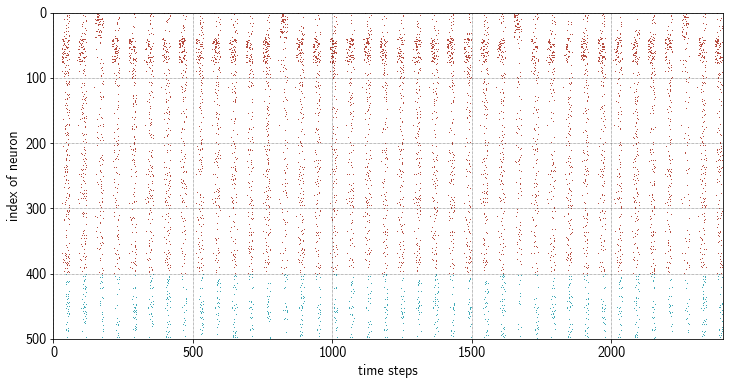

In [13]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(figsize=(12,6))

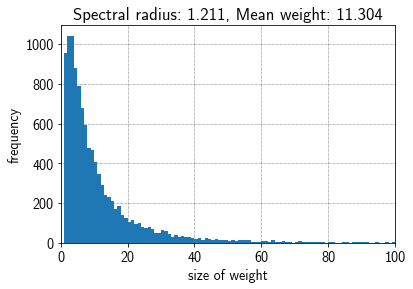

In [14]:
exp.net.plot.initialExWeightDistribution(figsize=(6,4), xlim=(0,100))

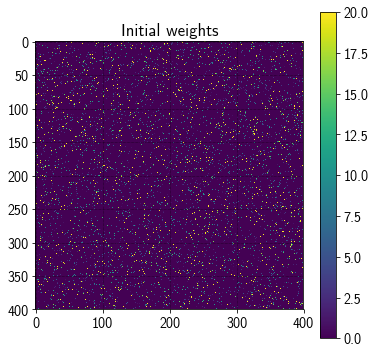

In [15]:
# Weight matrix before learning
exp.net.plot.initialExWeightMatrix()

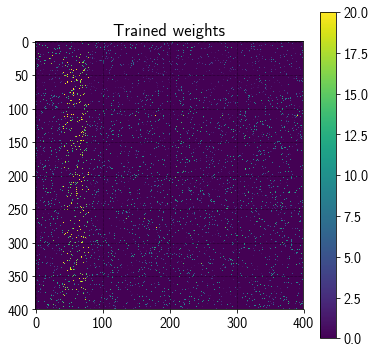

In [16]:
# Weight matrix after learning
exp.net.plot.trainedExWeightMatrix()

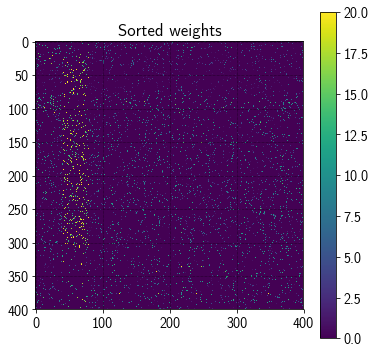

In [17]:
# Sorted weight matrix after learning
expSupportMask = utils.getSupportWeightsMask(exp.net.trainedWeightsExex[-1])
exp.net.plot.weightsSortedBySupport(expSupportMask, exp.net.trainedWeightsExex[-1])

In [18]:
nCs = exp.net.p.inputNumTargetNeurons
nEx = exp.net.p.reservoirExSize
nC = exp.net.p.inputVaryNum

In [19]:
nCs, nEx, nC

(40, 400, 2)

In [20]:
#weightsExEx = exp.net.trainedWeightsExex[-1]
#np.save('weightsExEx', weightsExEx)

In [21]:
inputs = utils.getInputLetterList(exp.net.inputTrials)

In [22]:
supportMasks = utils.getSupportMasksForAllTrials(exp.net.initialWeights.exex, exp.net.trainedWeightsExex)

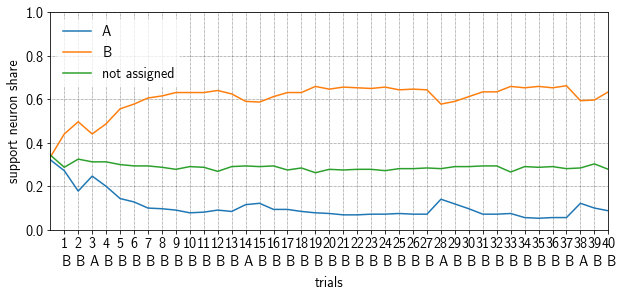

In [23]:
exp.net.plot.supportShare(supportMasks)

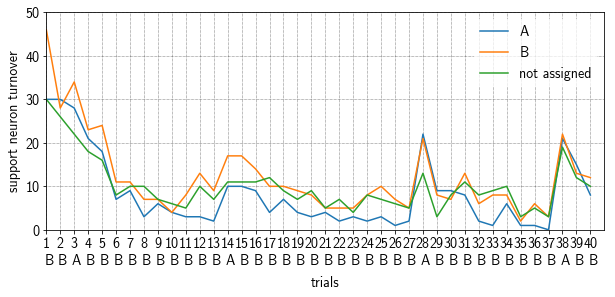

In [24]:
exp.net.plot.supportTurnover(supportMasks)

In [25]:
# New parameters
newParameters = {
    **parameters,
    'trials': 40,
    'inputVaryProbs': [0.9, 0.1]
}

In [26]:
# Initilizes a second experiment
exp2 = AssemblyExperiment(name='assemblies-retrain', parameters=newParameters)

In [27]:
#np.array_equal(exp.initialMasks.exex.toarray(), exp2.initialMasks.exex.toarray())

In [29]:
# Build network
weights = deepcopy(exp.net.initialWeights)
weights.exex = exp.net.trainedWeightsExex[-1]
exp2.build(exp.net.initialMasks, weights)

In [30]:
# Run network
exp2.run()

INFO:DRV:  Connecting to 127.0.0.1:45055
INFO:DRV:      Host server up..............Done 0.49s
INFO:DRV:      Encoding axons/synapses.....Done 0.33s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1611663840.1762774
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1611663840.1762774/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/

INFO:DRV:      Configuring registers.......Done 0.45s
INFO:DRV:      Transferring spikes.........Done 1.04s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1611663840.1762774/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 60, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61 to 70
INFO:HST:  chip=0 cpu=0 Reset functional state at 70
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 121 to 130
INFO:HST:  chip=0 cpu=0 Reset functional state at 130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 181 to 190
INFO:HST:  chip=0 cpu=0 Reset functional state at 190
INFO:HST:  chip=0 cpu=0 Reset current/volt

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1801 to 1810
INFO:HST:  chip=0 cpu=0 Reset functional state at 1810
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1861 to 1870
INFO:HST:  chip=0 cpu=0 Reset functional state at 1870
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1921 to 1930
INFO:HST:  chip=0 cpu=0 Reset functional state at 1930
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1981 to 1990
INFO:HST:  chip=0 cpu=0 Reset functional state at 1990
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2041 to 2050
INFO:HST:  chip=0 cpu=0 Reset functional state at 2050
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2101 to 2110
INFO:HST:  chip=0 cpu=0 Reset functional state at 2110
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2161 to 2170
INFO:HST:  chip=0 cpu=0 Reset functional state at 2170
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2221 to 2230
INFO:HST:  chip=0 cpu=0

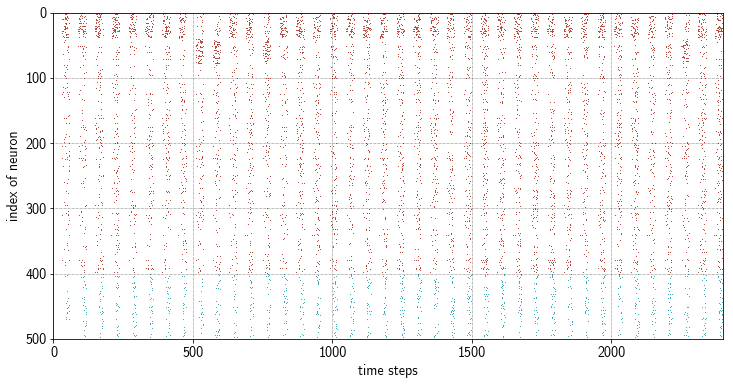

In [31]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp2.net.plot.reservoirSpikeTrain(figsize=(12,6))

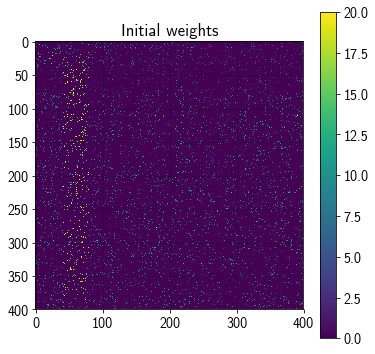

In [32]:
# Weight matrix before learning
exp2.net.plot.initialExWeightMatrix()

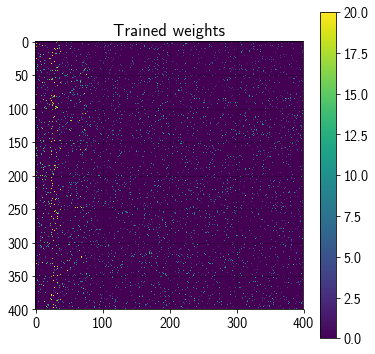

In [33]:
# Weight matrix after learning
exp2.net.plot.trainedExWeightMatrix()

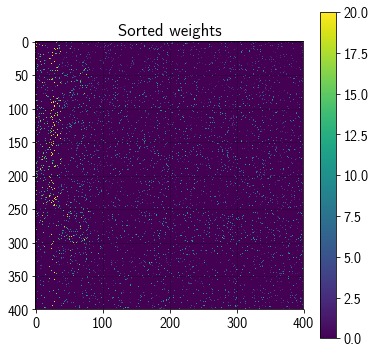

In [34]:
# Sorted weight matrix after learning
exp2SupportMask = utils.getSupportWeightsMask(exp2.net.trainedWeightsExex[-1])
exp2.net.plot.weightsSortedBySupport(exp2SupportMask, exp2.net.trainedWeightsExex[-1])

In [35]:
supportMasks = utils.getSupportMasksForAllTrials(exp2.net.initialWeights.exex, exp2.net.trainedWeightsExex)

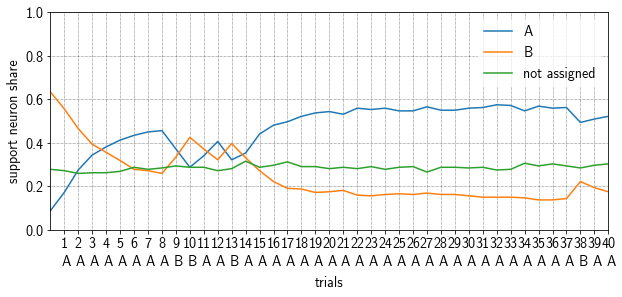

In [36]:
exp2.net.plot.supportShare(supportMasks)
# TODO More trials do not help, need more noise?

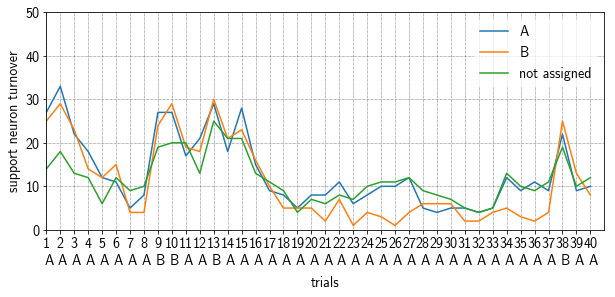

In [37]:
exp2.net.plot.supportTurnover(supportMasks)